In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


**Importing Dataset**

In [2]:
data=pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [4]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**Data Visualisation**

*Analysing the Visuals*

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Sex', ylabel='HeartDisease'>

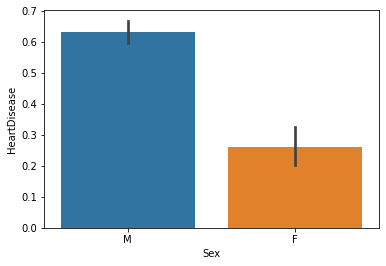

In [7]:
import warnings
warnings.filterwarnings("ignore")
sns.barplot("Sex","HeartDisease",data=data)

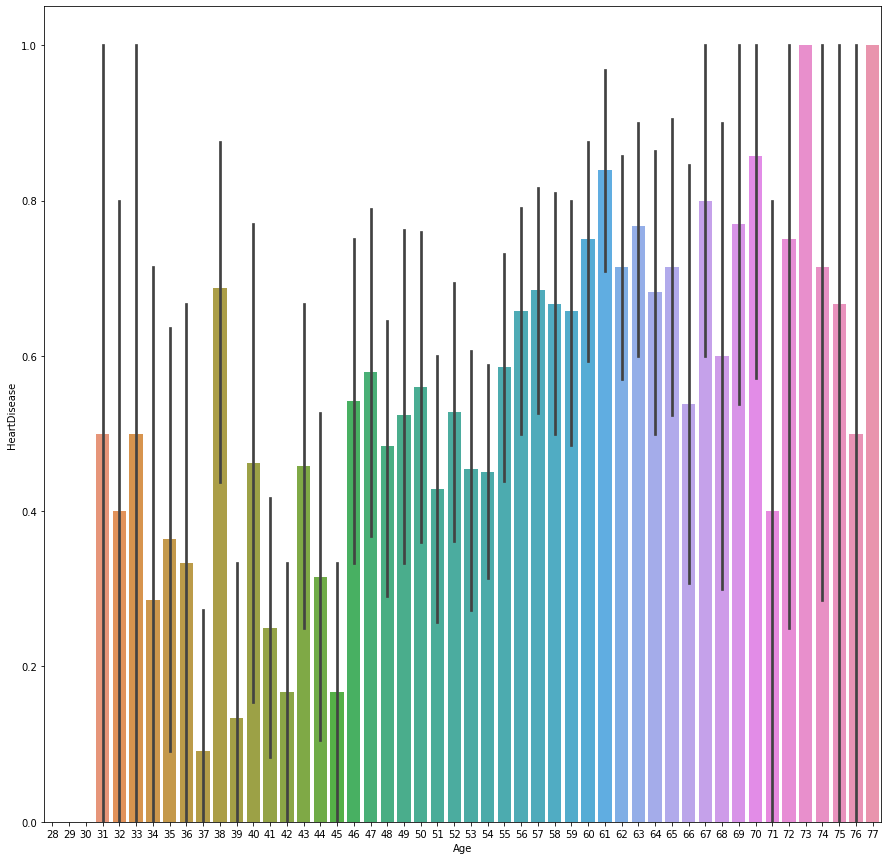

In [8]:
plt.figure(figsize=(15,15))
sns.barplot("Age","HeartDisease",data=data)
plt.show()

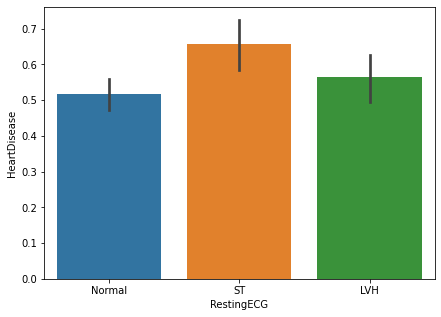

In [9]:
plt.figure(figsize=(7,5))
sns.barplot("RestingECG","HeartDisease",data=data)
plt.show()

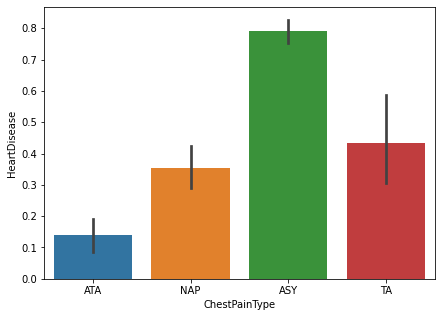

In [10]:
plt.figure(figsize=(7,5))
sns.barplot("ChestPainType","HeartDisease",data=data)
plt.show()

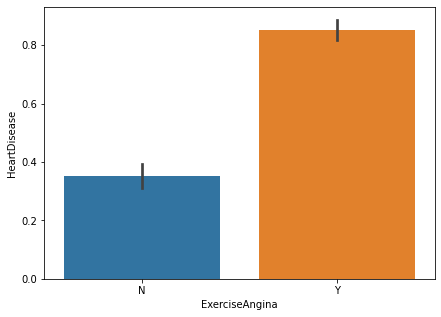

In [11]:
plt.figure(figsize=(7,5))
sns.barplot("ExerciseAngina","HeartDisease",data=data)
plt.show()

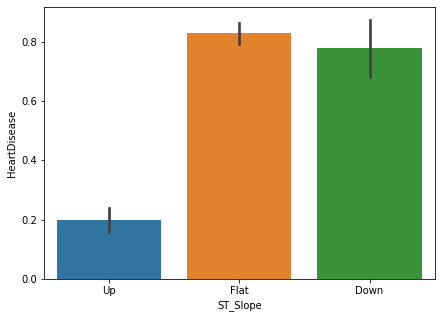

In [12]:
plt.figure(figsize=(7,5))
sns.barplot("ST_Slope","HeartDisease",data=data)
plt.show()

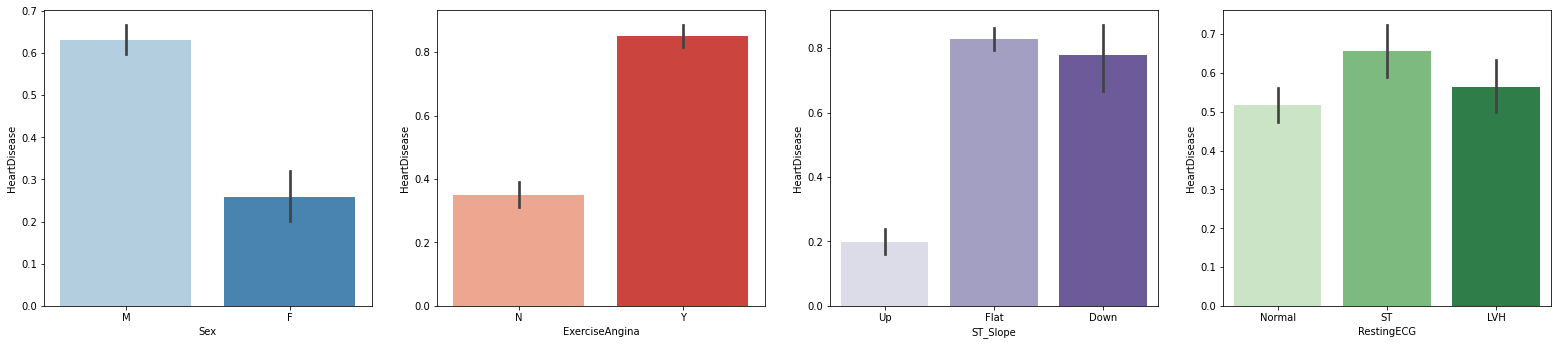

In [13]:
plt.figure(figsize=(27,25))
plt.subplot(4,4,1)
sns.barplot("Sex","HeartDisease",data=data,palette="Blues")
plt.subplot(4,4,2)
sns.barplot("ExerciseAngina","HeartDisease",data=data,palette="Reds")
plt.subplot(4,4,3)
sns.barplot("ST_Slope","HeartDisease",data=data,palette="Purples")
plt.subplot(4,4,4)
sns.barplot("RestingECG","HeartDisease",data=data,palette="Greens")
plt.show()

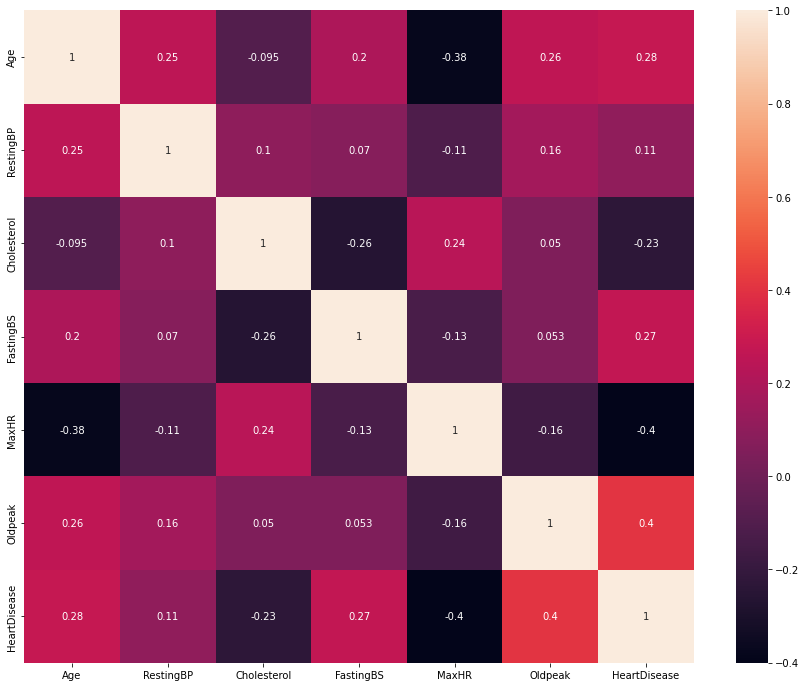

In [14]:
plt.figure(figsize=(15,12))
cor=data.corr()
sns.heatmap(cor,annot=True,)
plt.show()

**Scaling,Spliting and Replacing the Objects and Ints**

In [15]:
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split

In [16]:
data.replace({"Normal":0,"ST":1,"LVH":2,"N":0,"Y":1,"ATA":0,"NAP":1,"ASY":2,"TA":3,"Up":0,"Flat":1,"Down":2,"M":0,"F":1},inplace=True)

In [17]:
Y=data["HeartDisease"].values
X=((data.loc[:,data.columns!="HeartDisease"]).astype(int)).values[:,0:]

In [18]:
Scaler=StandardScaler()

In [19]:
X_scaled=Scaler.fit_transform(X)

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=2)

**MODEL TRAINING**

In [21]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

In [22]:
X_train=torch.tensor(X_train).float()
X_test=torch.tensor(X_test).float()
Y_train=torch.tensor(Y_train).long()
Y_test=torch.tensor(Y_test).long()

In [23]:
class heartdis(nn.Module):
    def __init__(self):
        super(heartdis,self).__init__()
        self.fc1=nn.Linear(11,150)
        self.fc2=nn.Linear(150,150)
        self.fc3=nn.Linear(150,2)
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        return self.fc3(x)

In [24]:
model=heartdis()

In [25]:
from torch import optim
optimizer=optim.Adam(model.parameters())
criterion=nn.CrossEntropyLoss()

In [26]:
losses=[]

*creating epoches and minimising the loss*

In [27]:
for epoch in range(1,250):
    optimizer.zero_grad()
    output=model(X_train)
    loss=criterion(output,Y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    print("Epoch {},Loss {}".format(epoch,loss.item(),verbose=1))

Epoch 1,Loss 0.6999260783195496
Epoch 2,Loss 0.6682896614074707
Epoch 3,Loss 0.6389825940132141
Epoch 4,Loss 0.6113554239273071
Epoch 5,Loss 0.5849921107292175
Epoch 6,Loss 0.5596599578857422
Epoch 7,Loss 0.5353624224662781
Epoch 8,Loss 0.512112557888031
Epoch 9,Loss 0.48996832966804504
Epoch 10,Loss 0.4691379964351654
Epoch 11,Loss 0.44985079765319824
Epoch 12,Loss 0.4323471486568451
Epoch 13,Loss 0.41680553555488586
Epoch 14,Loss 0.4033368229866028
Epoch 15,Loss 0.3919222056865692
Epoch 16,Loss 0.3825778067111969
Epoch 17,Loss 0.3751828968524933
Epoch 18,Loss 0.3695445954799652
Epoch 19,Loss 0.3653233051300049
Epoch 20,Loss 0.3621883690357208
Epoch 21,Loss 0.3597961366176605
Epoch 22,Loss 0.35779720544815063
Epoch 23,Loss 0.35593563318252563
Epoch 24,Loss 0.354041188955307
Epoch 25,Loss 0.35199692845344543
Epoch 26,Loss 0.3497673273086548
Epoch 27,Loss 0.3473660349845886
Epoch 28,Loss 0.3448100686073303
Epoch 29,Loss 0.34216251969337463
Epoch 30,Loss 0.3394383490085602
Epoch 31,Loss 

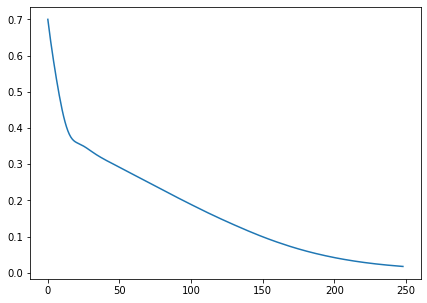

In [28]:
plt.figure(figsize=(7,5))
plt.plot(losses)

In [29]:
prediction=model(X_test)
pred_y=torch.max(prediction,1)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [31]:
pred_y.indices

tensor([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
        0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0])

In [32]:
accuracy_score(Y_test,pred_y.indices)

0.8206521739130435

In [33]:
Test=pd.DataFrame(X_test.numpy())

In [34]:
Test["Actual"]=Y_test
Test["Prediction"]=pred_y.indices

In [35]:
Test.head()

,0,1,2,3,4,5,6,7,8,9,10,Actual,Prediction
0,-0.160265,-0.515952,-0.530992,-0.237597,-1.818435,-0.551341,0.492241,1.697314,-0.823556,2.303858,-1.052114,1,0
1,-1.114921,-0.515952,0.643588,-0.940145,-1.818435,-0.551341,-0.749180,0.321877,1.214246,1.293375,0.596078,1,1
2,1.855121,-0.515952,0.643588,-0.129513,0.203069,-0.551341,0.492241,-0.857069,1.214246,-0.727592,0.596078,1,1
3,-1.751359,-0.515952,0.643588,-0.129513,1.062894,-0.551341,-0.749180,0.832754,-0.823556,-0.727592,-1.052114,0,0
4,-0.054192,-0.515952,0.643588,-0.345682,-1.818435,-0.551341,-0.749180,-1.210752,-0.823556,-0.727592,0.596078,1,1


**The Values in the above Table is same values of the test data since it was scaled using StandardScaler negative to positive integer.**

In [36]:
samp=[[48,1,2,138,214,0,0,108,1,1.5,1]]
Input=torch.tensor(samp).float()
out=model(Input)
output=torch.max(out,1)
output.indices
if(output.indices==1):
    print("Patient has Heart Failure.")
else:
    print("Patient is Normal.")

Patient has Heart Failure.
